                                                        What is Sentence Transformer:
SentenceTransformers is a Python module that provides easy-to-use tools for computing and comparing high-quality sentence and text embeddings. It’s built on top of Hugging Face’s Transformers library and extends it to offer pre-trained models optimized specifically for creating sentence and text embeddings. These embeddings are useful for tasks such as:

Semantic Textual Similarity: Measuring the similarity between sentences.

Clustering: Grouping sentences or texts with similar meanings.

Information Retrieval: Finding relevant documents or sentences in large datasets.

Classification and Sentiment Analysis: Using embeddings as input features for further model training.

SentenceTransformers includes a wide variety of pre-trained models (like BERT, RoBERTa, and DistilBERT) fine-tuned for tasks that involve sentence comparisons. It offers high-quality results for tasks involving sentence similarity and semantic search.

<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.7/268.7 kB 4.1 MB/s eta 0:00:00a 0:00:01


In [2]:
from sklearn.cluster import AgglomerativeClustering,KMeans
from sentence_transformers import SentenceTransformer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [3]:
# Define the corpus
corpus = [
    "Rain is expected tomorrow.",
    "Stock prices are fluctuating a lot.",
    "Today is sunny and warm.",
    "A sunny day with clear skies.",
    "The weather is nice and bright today.",
    "Heavy rain is predicted for the weekend.",
    "The stock market is experiencing volatility.",
    "Tomorrow will bring more sunshine.",
    "A beautiful day to go for a walk.",
    "It's getting cloudy, might rain soon.",
    "I love sunny days at the beach.",
    "The forecast indicates possible thunderstorms.",
    "Investors are worried about market trends.",
    "It feels great to be outside on such a lovely day.",
    "There might be a chance of rain later.",
    "Prices are rising due to market instability.",
    "A perfect day for a picnic in the park.",
    "Don't forget your umbrella, just in case.",
    "The sun is shining, and it's quite warm.",
    "There will be sunny spells throughout the day.",
    "It's a good day for outdoor activities."
]

<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [4]:
# # Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
# Encode the corpus
embeddings = model.encode(corpus, convert_to_tensor=True)
# Move embeddings to CPU and convert to NumPy array
embeddings_np = embeddings.cpu().numpy()
embeddings_np

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

array([[-0.02606718, -0.00436905,  0.14482881, ..., -0.0476143 ,
        -0.06893136,  0.05910521],
       [ 0.06741109, -0.07933212,  0.08097953, ..., -0.16500428,
        -0.02614762,  0.04517477],
       [ 0.00411608,  0.10016756,  0.10564079, ..., -0.019964  ,
        -0.10154205,  0.03622726],
       ...,
       [ 0.04073852,  0.0693018 ,  0.09536368, ...,  0.00253988,
        -0.10061658,  0.03612088],
       [-0.01061354,  0.04267793,  0.08422717, ..., -0.03273542,
        -0.06823533,  0.01269216],
       [ 0.00613733,  0.08773935,  0.13383222, ..., -0.01177465,
        -0.07894175,  0.02521428]], dtype=float32)

In [6]:
embeddings_np.shape

(21, 384)

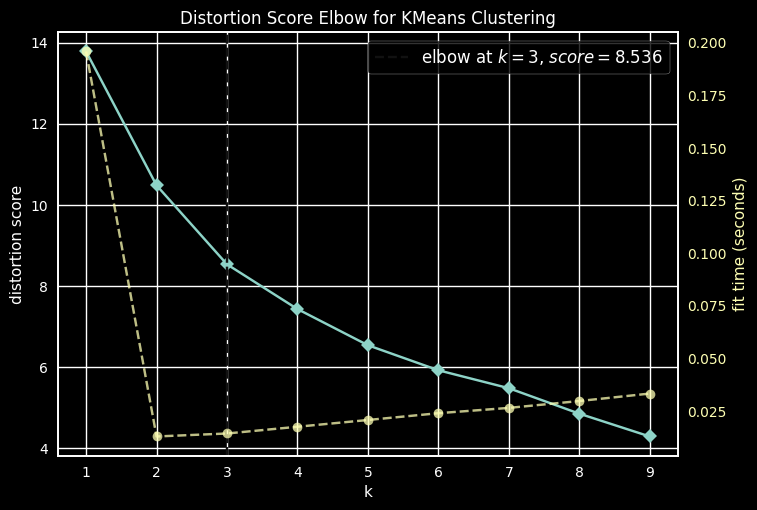

In [7]:
plt.style.use('dark_background')
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(embeddings_np)
visualizer.show()
plt.show()

In [8]:
# Perform clustering based on sentence embeddings KMeans
KMeansModel = KMeans(n_clusters=3,random_state=44)
y = KMeansModel.fit_predict(embeddings_np)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[ 0.00208796  0.06638163  0.10802941 ...  0.0060862  -0.08555996
   0.0077247 ]
 [-0.00878778 -0.00955789  0.12359659 ... -0.05445347 -0.05869273
   0.0564333 ]
 [ 0.04000167 -0.06041933  0.03294745 ... -0.1170095  -0.03011884
   0.06221053]]
KMeansModel labels are :  [1 2 0 0 0 1 2 0 0 1 0 1 2 0 1 2 0 1 0 0 0]
KMeansModel intertia is :  8.535573959350586
KMeansModel No. of iteration is :  2


In [9]:
# Display clusters
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(y):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for cluster_id, sentence_list in clustered_sentences.items():
    print(f"\nCluster {cluster_id}: {sentence_list}\n")
    print('*'*80)

# Define cluster names based on observed themes
cluster_names = {
    0: "Sunny Weather",
    1: "Stock Market Volatility",
    2: "Rainy Weather Forecast"
}

# Display clusters with assigned names
for cluster_id, sentence_list in clustered_sentences.items():
    print(f"\n{cluster_names[cluster_id]} (Cluster {cluster_id}): {sentence_list}\n")
    print('*'*80)


Cluster 1: ['Rain is expected tomorrow.', 'Heavy rain is predicted for the weekend.', "It's getting cloudy, might rain soon.", 'The forecast indicates possible thunderstorms.', 'There might be a chance of rain later.', "Don't forget your umbrella, just in case."]

********************************************************************************

Cluster 2: ['Stock prices are fluctuating a lot.', 'The stock market is experiencing volatility.', 'Investors are worried about market trends.', 'Prices are rising due to market instability.']

********************************************************************************

Cluster 0: ['Today is sunny and warm.', 'A sunny day with clear skies.', 'The weather is nice and bright today.', 'Tomorrow will bring more sunshine.', 'A beautiful day to go for a walk.', 'I love sunny days at the beach.', 'It feels great to be outside on such a lovely day.', 'A perfect day for a picnic in the park.', "The sun is shining, and it's quite warm.", 'There will

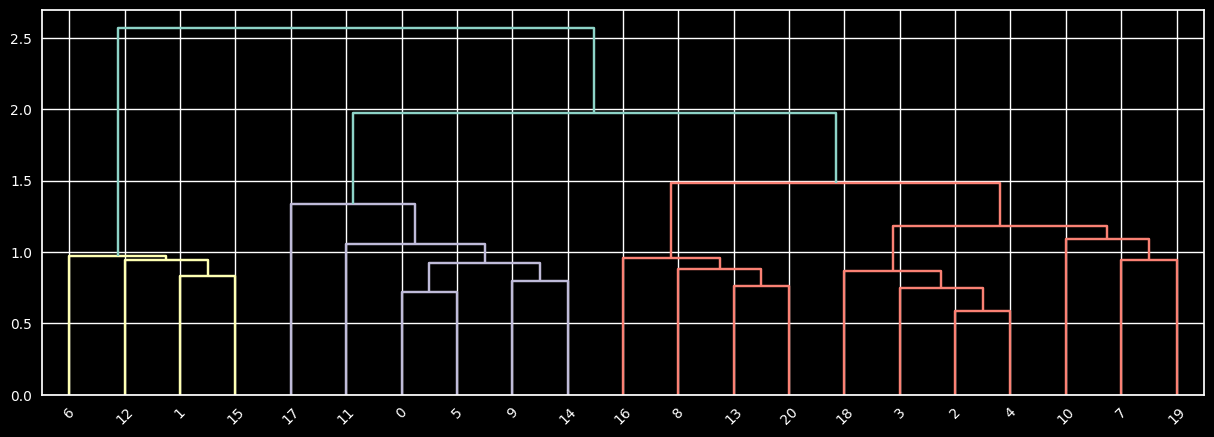

In [10]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(embeddings_np, method = 'ward'))
plt.show()

In [11]:
# Perform clustering based on sentence embeddings
AggClusteringModel = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y = AggClusteringModel.fit_predict(embeddings_np)
y

array([2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0])

In [12]:
# Display clusters
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(y):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for cluster_id, sentence_list in clustered_sentences.items():
    print(f"\nCluster {cluster_id}: {sentence_list}\n")
    print('*'*80)

# Define cluster names based on observed themes
cluster_names = {
    0: "Sunny Weather",
    1: "Stock Market Volatility",
    2: "Rainy Weather Forecast"
}

# Display clusters with assigned names
for cluster_id, sentence_list in clustered_sentences.items():
    print(f"\n{cluster_names[cluster_id]} (Cluster {cluster_id}): {sentence_list}\n")
    print('*'*80)


Cluster 2: ['Rain is expected tomorrow.', 'Heavy rain is predicted for the weekend.', "It's getting cloudy, might rain soon.", 'The forecast indicates possible thunderstorms.', 'There might be a chance of rain later.', "Don't forget your umbrella, just in case."]

********************************************************************************

Cluster 1: ['Stock prices are fluctuating a lot.', 'The stock market is experiencing volatility.', 'Investors are worried about market trends.', 'Prices are rising due to market instability.']

********************************************************************************

Cluster 0: ['Today is sunny and warm.', 'A sunny day with clear skies.', 'The weather is nice and bright today.', 'Tomorrow will bring more sunshine.', 'A beautiful day to go for a walk.', 'I love sunny days at the beach.', 'It feels great to be outside on such a lovely day.', 'A perfect day for a picnic in the park.', "The sun is shining, and it's quite warm.", 'There will